# Pyplot

In [2]:
# Source Seaborn histplot: https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import pandas as pd
#import seaborn as sns

# df = pd.DataFrame(np.random.rand(1000,20))

# k=list(df.columns).index(5)

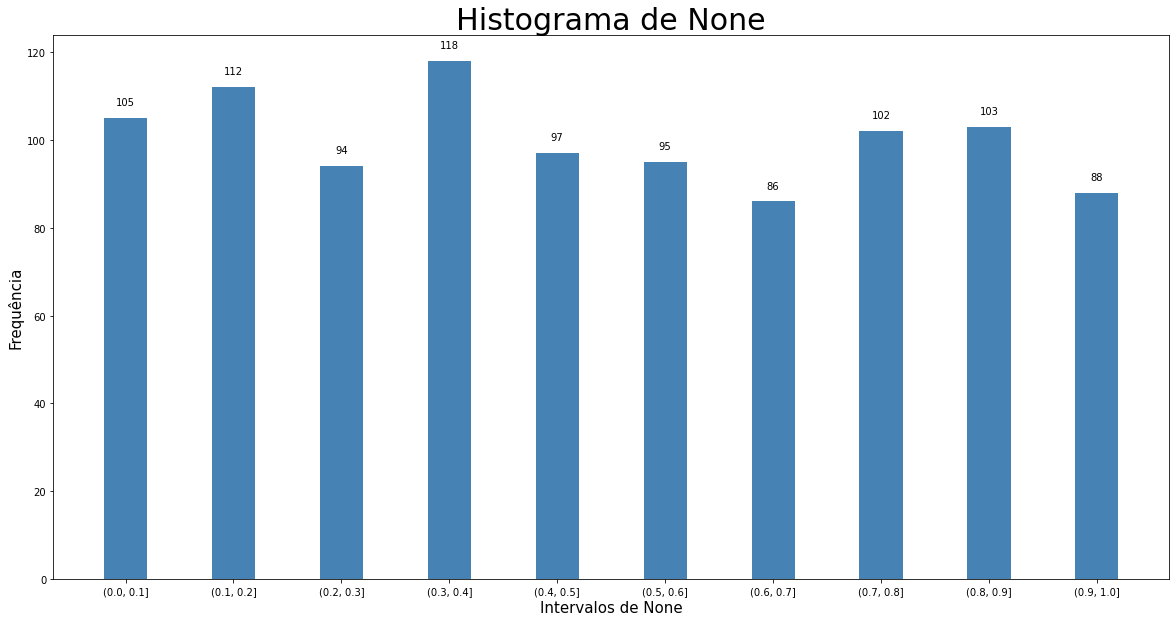

In [6]:
def hist_for_feature(df, name_col=None, bins=True, b=10, title=None, color='steelblue', data_labels=True):
    
    if name_col is not None:
        k = list(df.columns).index(name_col)
    else:
        k=0
    
    # Create a figure
    fig, axs = plt.subplots(figsize=(20, 10))
    fig.set_facecolor('white')
        
    if bins:
        _, edges = pd.cut(df[df.columns[k]].astype(float), bins=b, retbins=True)
        limits_labels = [f'({abs(edges[i]):.1f}, {edges[i+1]:.1f}]' for i in range(b)]

        df['bins'] = pd.cut(df[df.columns[k]], bins=b, labels=limits_labels)
    else:
        df['bins'] = df[name_col]
        
    f_agg = {'index' : 'count'}
    df = df.reset_index().groupby('bins').agg(f_agg)
    x_axis = [str(i) for i in df.index]
    
    # Create a secondary axis
    #axs_2 = axs.twinx()
    if title:
        axs.set_title(title, fontsize= 30)
    else:
        axs.set_title(f'Histograma de {name_col}', fontsize= 30)

    # Creating the bar plot
    plt.bar(x=x_axis, height=df[df.columns[0]], color = color, width = 0.4)

    # Clean axis labels
    axs.set_ylabel('Frequência', fontsize= 15)
    #axs_2.set_ylabel('Count', fontsize= 15)
    
    axs.set_xlabel(f'{name_col}', fontsize= 15)
    
    if data_labels:
        rects = axs.patches
        col_values = df[df.columns[0]].reset_index(drop=True)
        labels = ['{:,}'.format(col_values[i]).replace(',','.') for i in range(len(rects))]

        for rect, label in zip(rects, labels):
            height = rect.get_height()
            axs.text(
                rect.get_x() + rect.get_width() / 2, height + 2.5, label, ha="center", va="bottom", fontsize=10
            )

    
    return fig, df

# fig = dist_by_feature(df)

# fig.show()

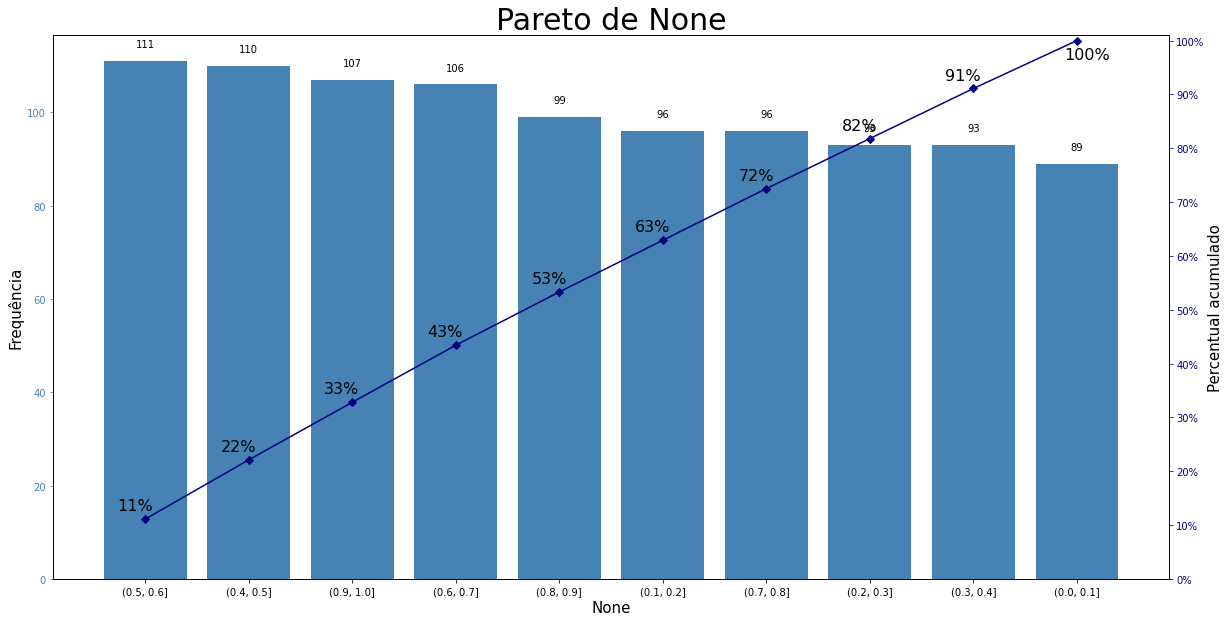

In [33]:
def pareto_for_feature(df, name_col=None, bins=True, b=10, title=None, color='steelblue', data_labels=True, bar_offset=2.5, rotate_ticks=False, color1 = 'steelblue', color2 = 'navy', sort_count=True):
    
    if name_col is not None:
        k = list(df.columns).index(name_col)
    else:
        k=0
    
    # Create a figure
    fig, axs = plt.subplots(figsize=(20, 10))
    fig.set_facecolor('white')
        
    if bins:
        _, edges = pd.cut(df[df.columns[k]].astype(float), bins=b, retbins=True)
        limits_labels = [f'({abs(edges[i]):.1f}, {edges[i+1]:.1f}]' for i in range(b)]

        df['bins'] = pd.cut(df[df.columns[k]], bins=b, labels=limits_labels)
    else:
        df['bins'] = df[name_col]
        
    f_agg = {'index' : 'count'}
    df = df.reset_index().groupby('bins').agg(f_agg)
    x_axis = [str(i) for i in df.index]
    
    #sort DataFrame by count descending
    #df = df.sort_values(by=df.columns[0], ascending=False)
    if sort_count:
        df = df.sort_values(by='count', ascending=False)

    #add column to display cumulative percentage
    df['cumperc'] = df[df.columns[0]].cumsum()/df[df.columns[0]].sum()

    #define aesthetics for plot
    line_size = 6

    #create basic bar plot
    # Create a figure
    axs.bar(df.index, df[df.columns[0]], color=color1)

    #add cumulative percentage line to plot
    ax2 = axs.twinx()
    ax2.plot(df.index, df['cumperc'], color=color2, marker="D", ms=line_size)
    ax2.yaxis.set_major_formatter(PercentFormatter())

    #specify axis colors
    axs.tick_params(axis='y')#, colors=color1)
    ax2.tick_params(axis='y')#, colors=color2)

    for x_val, y_val in zip (range(len(df)), df["cumperc"]):
        # set the format of the text to %
        text = f"{y_val:.0%}"

        # place the text labels on the graph
        if y_val > .95:
            ax2.text(
                x=x_val+0.10,
                y=y_val-0.025,
                s=text, 
                fontsize=10,
                color="black",
                ha="center",
                va="center"
            )
        else:
            ax2.text(
                x=x_val-0.10,
                y=y_val+0.025,
                s=text, 
                fontsize=10,
                color="black",
                ha="center",
                va="center"
            )

    ax2.set_ylim(0, 1.01)
    ax2.set_yticks(np.arange(0, 1.05, 0.1))
    ax2.set_yticklabels([f"{y_val:.0%}" for y_val in np.arange(0, 1.05, 0.1)])
    
    # Create a secondary axis
    #axs_2 = axs.twinx()
    if title:
        axs.set_title(title, fontsize= 30)
    else:
        axs.set_title(f'Pareto de {name_col}', fontsize= 30)

    # Creating the bar plot
    #plt.bar(x=x_axis, height=df[df.columns[0]], color = color, width = 0.4)

    # Clean axis labels
    axs.set_ylabel('Frequência', fontsize= 15)
    ax2.set_ylabel('Percentual acumulado', fontsize= 15)
    
    axs.set_xlabel(f'{name_col}', fontsize= 15)
    
    if rotate_ticks:
        #axs.set_xticklabels(axs.get_xticks(), rotation = 45)
        axs.tick_params(axis='x', labelrotation = 45)
    
    if data_labels:
        rects = axs.patches
        col_values = df[df.columns[0]].reset_index(drop=True)
        labels = ['{:,}'.format(col_values[i]).replace(',','.') for i in range(len(rects))]

        for rect, label in zip(rects, labels):
            height = rect.get_height()
            axs.text(
                rect.get_x() + rect.get_width() / 2, height + bar_offset, label, ha="center", va="bottom", fontsize=10
            )

    
    return fig, df

# fig, _ = pareto_for_feature(df)

# fig.show()